5장 합성곱 신경망
 
5.1 합성곱 신경망
5.2 합성곱 신경망 맛보기
5.3 전이 학습
5.4 설명 가능한 CNN
5.5 그래프 합성곱 네트워크


# 5.1 합성곱 신경망

합성곱 신경망
- 이미지 전체를 한 번에 계산하는 것이 아닌 이미지의 국소적 부분을 계산함으로써 시간과 자원을 절약하여 이미지의 세밀한 부분까지 분석할 수 있는 신경망

# 5.1.1 합성곱층의 필요성


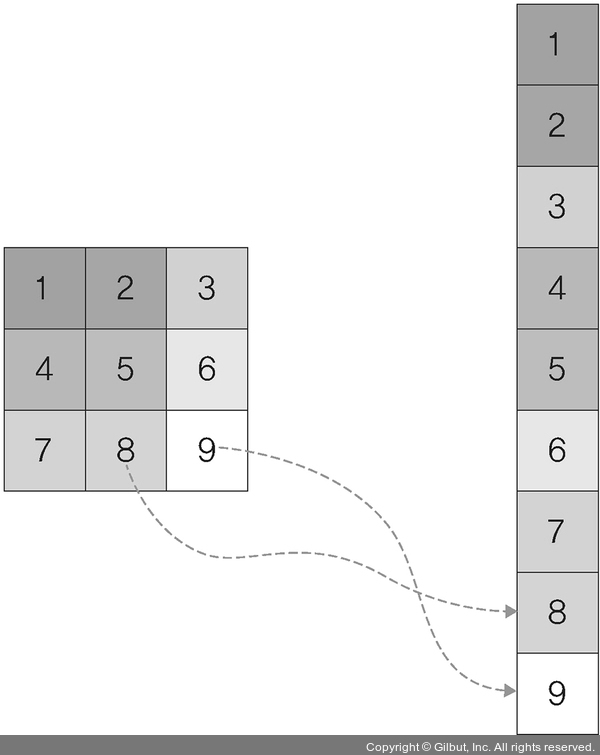

- 위의 그림과 같이 이미지 분석은 그림을 펼쳐서 전달함 
- 그러나 이미지를 펼쳐서 분석하면 **데이터의 공간적 구조를 무시하게 되는데 이를 방지하기 위해 합성곱층 사용**

# 5.1.2 합성곱 신경망 구조

**합성곱 신경망(Convolutional Neural Network, CNN or ConvNet)**
- 음성 인식이나 이미지 / 영상 인식에서 사용하는 신경망

계층 구성
1. 입력층
2. 합성곱층
3. 풀링층
4. 완전연결층
5. 출력층 

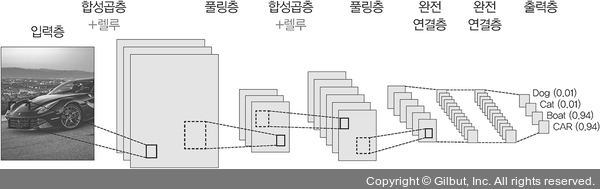

특징
- 합성곱층과 풀링층을 거치면서 입력 이미지의 주요 특성 벡터 추출
- 추출된 주요 특성 벡터는 완전 연결층을 거치면서 1차원 벡터로 변환  
- 최종적으로 소프트 맥스 함수를 사용하여 최종 결과 출력

## 입력층
- 입력 이미지가 최초로 거치는 층
- 높이(height), 너비(width), 채널(channel) 을 가지는 3차원 데이터
    - 그레이 스케일(gray scale) 이면 채널 값이 1
    - 컬러(RGB) 이면 3 값을 가짐

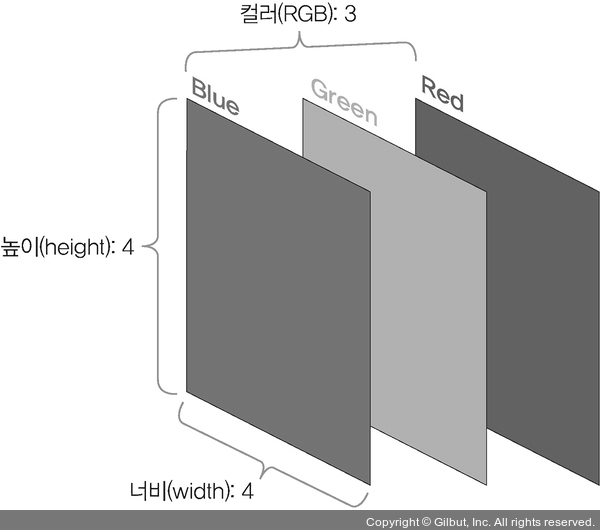

위의 그림은 높이 4, 너비 4, 채널 3인 (4, 4, 3) 인 이미지이다

## 합성곱층
- 입력 데이터에서 특성을 추출하는 역할

- 커널이나 필터를 이용하여 이미지의 특성을 감지

특성맵
- 커널/ 필터 를 이용해 모든 영역을 훑으며 특성을 추출한 결과물




특성맵의 과정


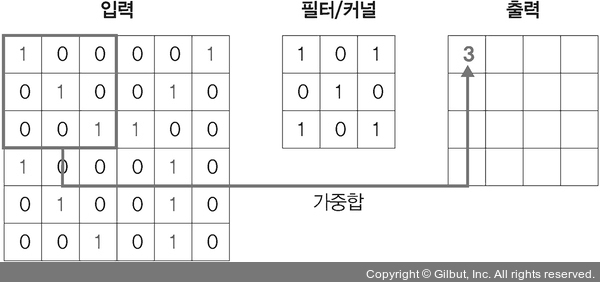

필터 3 * 3,  스트라이드 1

1단계. 입력 이미지에 3 * 3 필터 적용  
입력 이미지와 필터를 포개 놓고 대응되는 숫자 끼리 더함  
(1×1) + (0×0) + (0×1) + (0×0) + (1×1) + (0×0) + (0×1) + (0×0) + (1×1) = 3  

2단계. 필터를 1만큼 이동  
(0×1) + (0×0) + (0×1) + (1×0) + (0×1) + (0×0) + (0×1) + (1×0) + (1×1) = 1
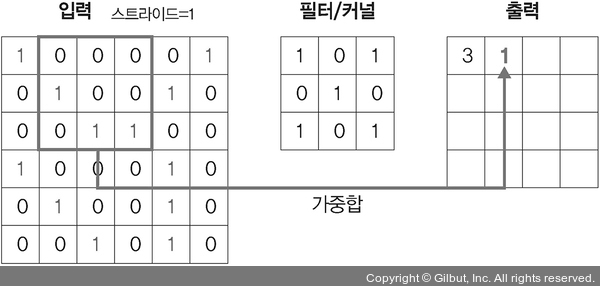

3간계. 필터를 1만큼 이동
(0×1) + (0×0) + (0×1) + (0×0) + (0×1) + (1×0) + (1×1) + (1×0) + (0×1) = 1
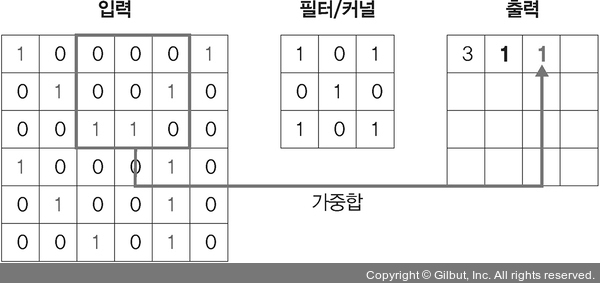

...  

4단계 필터가 1만큼 마지막 이동  
(0×1) + (1×0) + (0×1) + (0×0) + (1×1) + (0×0) + (0×1) + (1×0) + (0×1) = 1
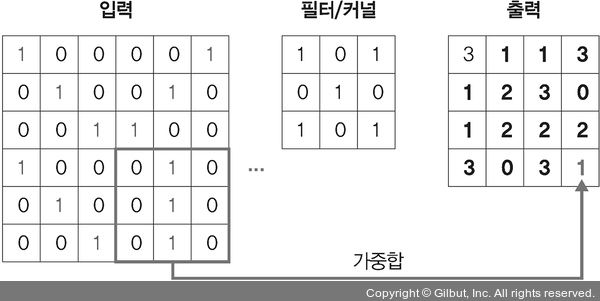  

위의 이미지와 같이 원본 (6, 6, 1) 크기가 (4, 4, 1) 크기의 특성맵으로 축소함을 볼수 있다.


컬러 이미지의 합성곱
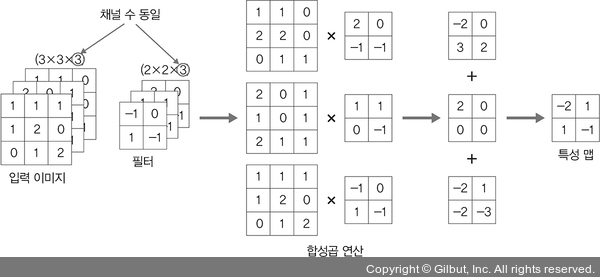

필터가 두개 이상인 합성곱

In [1]:
# 5-1 라이브러리 호출

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms # 데이터 전처리를 위해 사용하는 라이브 러리
from torch.utils.data import Dataset, DataLoader

In [2]:
# 5-2 CPU 혹은 GPU 장치 확인
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# 5-3 fashion_mnist 데이터셋 내려받기
train_dataset = torchvision.datasets.FashionMNIST("/dais03/KDY/Deep_Learning_Study/Data/Chapter5", download = True,
                                                  transform = transforms.Compose([transforms.ToTensor()])) # ToTensor 는 이미지를 텐서를 변경합니다.
test_dataset = torchvision.datasets.FashionMNIST("/dais03/KDY/Deep_Learning_Study/Data/Chapter5", download = True,
                                                 train = False, transform = transforms.Compose([transforms.ToTensor()]))# 테스트 데이터셋 다운

100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw/train-images-idx3-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw



100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw



100.0%


Extracting /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw



100.0%

Extracting /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /dais03/KDY/Deep_Learning_Study/Data/Chapter5/FashionMNIST/raw



In [ ]:
# 5-4 fashion_mnist 데이터를 데이터로더에 전달
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 100)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 100)

torch.utils.data.DataLoader()를 사용하여 원하는 크기의 배치 단위로 데이터를 불러오거나, 순서가 무작위로 섞이도록(shuffle) 할 수 있습니다. 데이터로더에서 사용하는 파라미터는 다음과 같습니다.